In [1]:
import numpy as np
import networkx as graphs
import matplotlib.pyplot as plt
import random # not very strong randomness. We don't care here.
import itertools as it # For the visualisation function

In [2]:
def draw_labeled_multigraph(G, max_edges, color=None):
    # Adapted from https://networkx.org/documentation/stable/auto_examples/drawing/plot_multigraphs.html
    connectionstyle = [f"arc3,rad={0.3*(-1)**r*r/max_edges}" for r in it.accumulate([1] * max_edges)]
    
    if color == None:
        color = ['k' for e in list(G.edges)]
    
    #pos = graphs.spring_layout(G)
    pos = graphs.circular_layout(G)
    graphs.draw_networkx_nodes(G, pos)
    graphs.draw_networkx_labels(G, pos)
    graphs.draw_networkx_edges(
        G, pos, connectionstyle=connectionstyle, edge_color=color, width=[1 if c=='k' else 4 for c in color]
    )

In [3]:
def karger_plot(G):
    G = graphs.MultiGraph(G);
    i=0 # Only used for file names
    while G.number_of_nodes() > 2:
        e = random.choice(list(G.edges))
        
        colors = ['k' if ee!=e else 'r' for ee in list(G.edges)]
        
        # Plotting
        plt.figure()
        draw_labeled_multigraph(G, 12, color=colors)
        plt.savefig('plotgraph-%d.png' % i, dpi=300, bbox_inches='tight')
        i += 1
        # End plotting
        
        G = graphs.contracted_edge(G, e, self_loops=False)

    # Plotting
    plt.figure()
    draw_labeled_multigraph(G, 12)
    plt.savefig('plotgraph-%d.png' % i, dpi=300, bbox_inches='tight')
    # End plotting
    
    cutsize = G.number_of_edges()
    return (G, cutsize)

In [4]:
def karger(G):
    G = graphs.MultiGraph(G);
    while G.number_of_nodes() > 2:
        e = random.choice(list(G.edges))        
        G = graphs.contracted_edge(G, e, self_loops=False)
    cutsize = G.number_of_edges()
    return (G, cutsize)

In [5]:
G = graphs.random_regular_graph(8,12)

Size of the cut obtained: 24


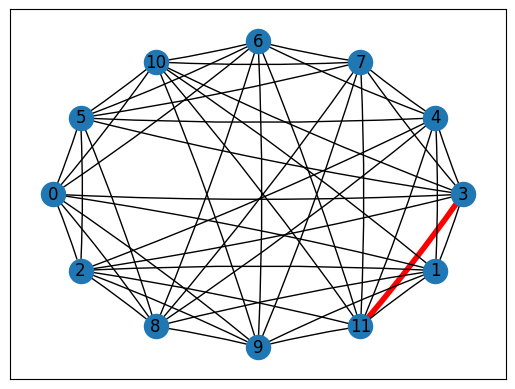

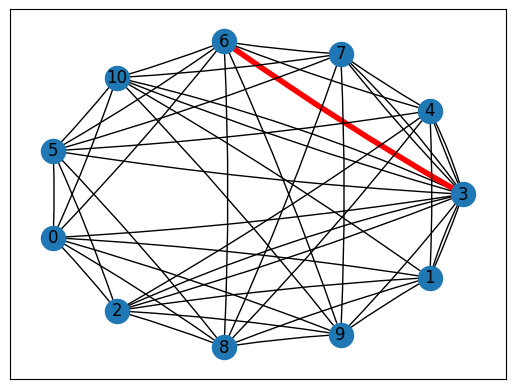

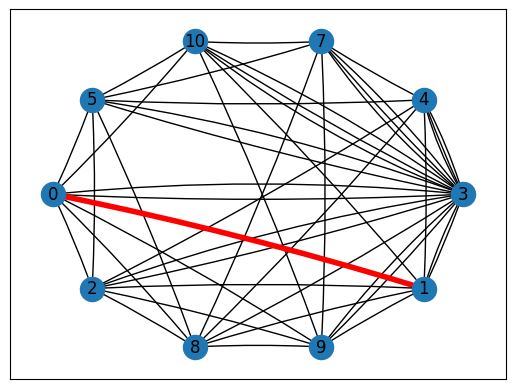

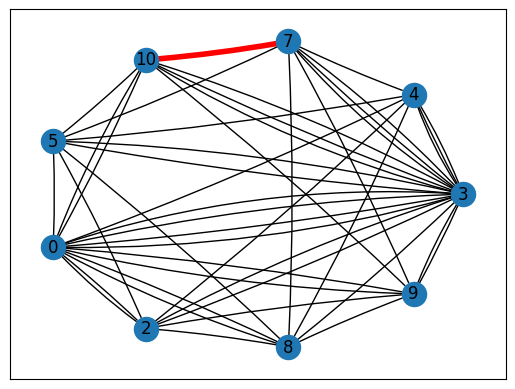

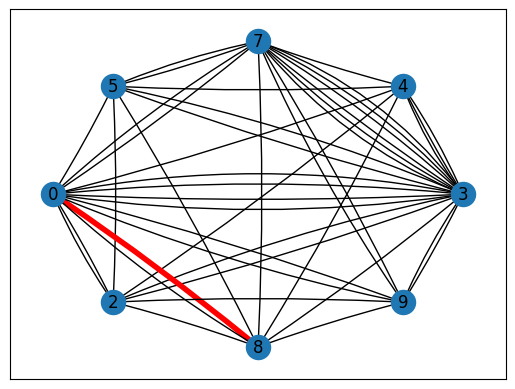

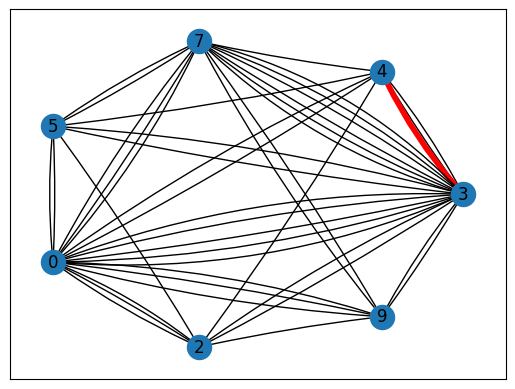

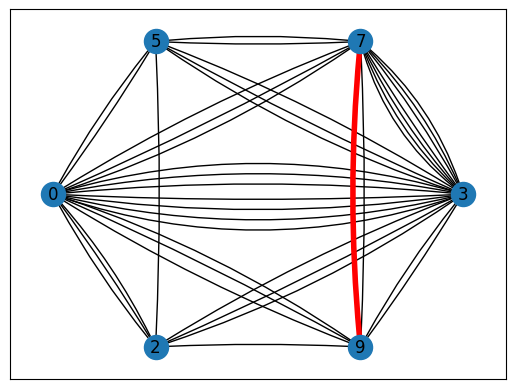

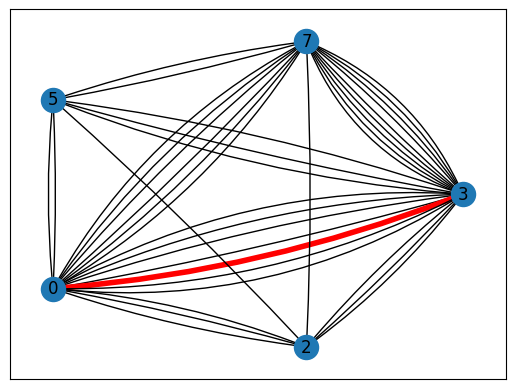

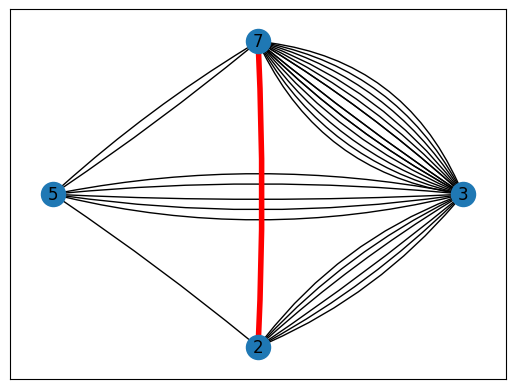

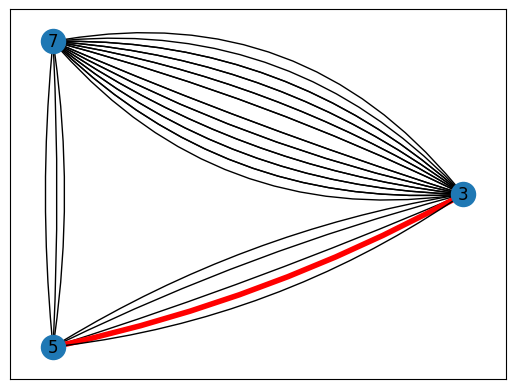

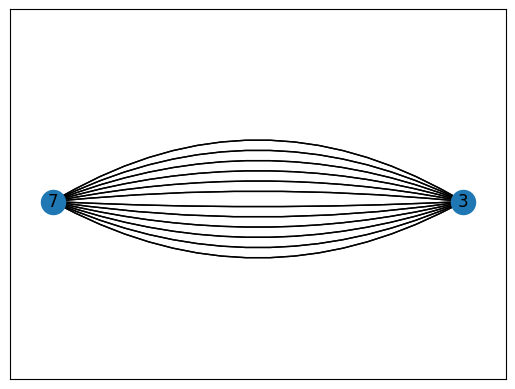

In [6]:
(H, s) = karger_plot(G)
print("Size of the cut obtained: %d" % s)

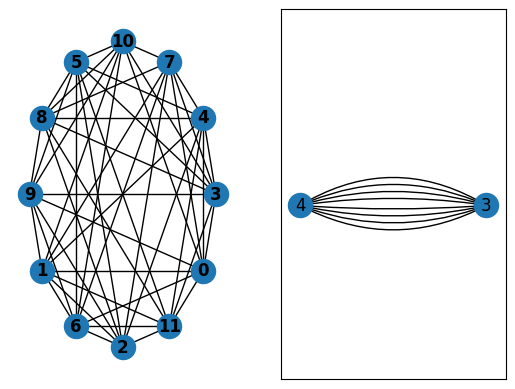

In [7]:
plt.subplot(121)
graphs.draw(G, with_labels=True, font_weight='bold', pos=graphs.circular_layout(G))
plt.subplot(122)
draw_labeled_multigraph(H, s)

In [8]:
G = graphs.random_regular_graph(10,100)
mincut_sizes = [karger(G)[1] for _ in range(100)]

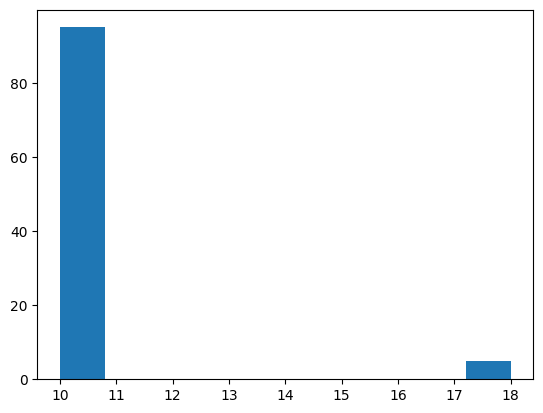

In [9]:
plt.hist(mincut_sizes);

In [10]:
def modified_karger(G, t):
    while G.number_of_nodes() > t:
        e = random.choice(list(G.edges))        
        G = graphs.contracted_edge(G, e, self_loops=False)
    return G
def karger_stein(G):
    if G.number_of_nodes() <= 2:
        return (G,G.number_of_edges())
    else:
        t = int(G.number_of_nodes()/np.sqrt(2))
        G1 = modified_karger(G,t)
        G2 = modified_karger(G,t)
        (C1,c1) = karger_stein(G1)
        (C2,c2) = karger_stein(G2)
        if c1>c2:
            return (C2,c2)
        else:
            return (C1,c1)
def ks_wrapper(G):
    G = graphs.MultiGraph(G);
    return karger_stein(G)

In [11]:
G = graphs.erdos_renyi_graph(100,0.25)

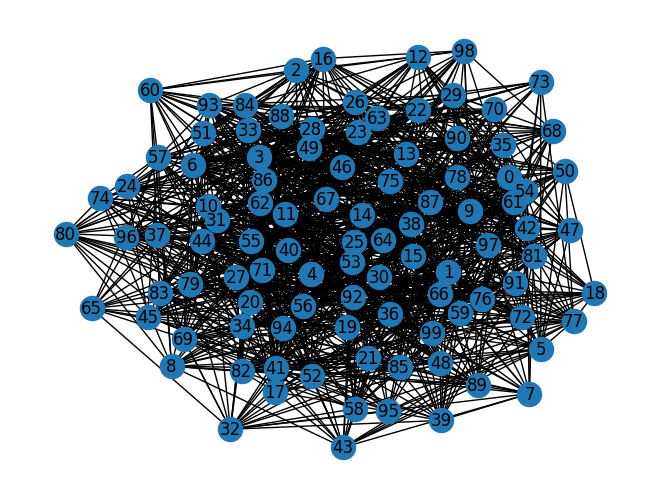

In [12]:
graphs.draw(G, with_labels=True, pos=graphs.spring_layout(G))

In [13]:
karger(G)[1]

14

In [14]:
ks_wrapper(G)[1]

14

In [15]:
print([karger(G)[1] for _ in range(10)])

[19, 16, 14, 16, 25, 14, 14, 14, 31, 17]


In [16]:
print([ks_wrapper(G)[1] for _ in range(10)])

[14, 14, 14, 14, 14, 14, 14, 14, 14, 14]


In [17]:
# More evaluations

In [69]:
G = graphs.erdos_renyi_graph(100,0.25)

In [87]:
karger_cuts = [karger(G)[1] for _ in range(50)]
kstein_cuts = [ks_wrapper(G)[1] for _ in range(50)]

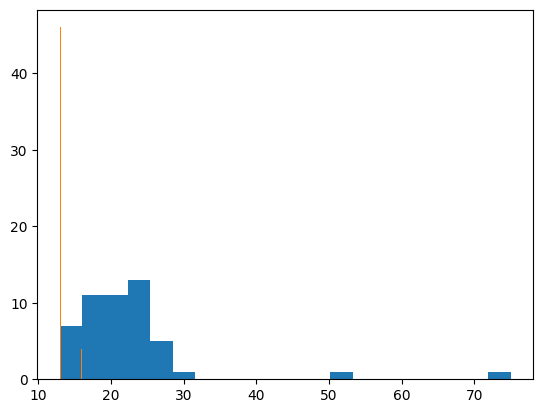

In [88]:
plt.hist(karger_cuts, bins=20);
plt.hist(kstein_cuts, bins=20);
plt.show();

In [66]:
# Figure for the C_n graph (worst case for number of min cuts)

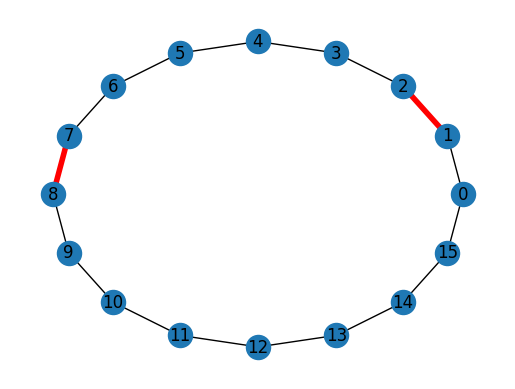

In [65]:
Cn = graphs.cycle_graph(16)
color = ['r' if (e==(1,2) or e==(7,8)) else 'k' for e in list(Cn.edges)]
weight = [4 if (e==(1,2) or e==(7,8)) else 1 for e in list(Cn.edges)]
pos=graphs.circular_layout(Cn)
graphs.draw_networkx_nodes(Cn, pos)
graphs.draw_networkx_labels(Cn, pos)
graphs.draw_networkx_edges(Cn, pos, edge_color=color, width=weight)
plt.box(False)
plt.show()